癌症分类预测-良／恶性乳腺癌肿瘤预测

In [42]:
# 1. 获取数据集
import pandas as pd
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
col_names = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                   'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                   'Normal Nucleoli', 'Mitoses', 'Class']

data = pd.read_csv(filepath_or_buffer=data_url, names=col_names)

In [43]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [44]:
# 2. 缺失值处理
import numpy as np
data.replace(to_replace='?', value=np.nan, inplace=True)
data.dropna(inplace=True)

In [45]:
# 划分数据集
from sklearn import model_selection
data_x = data.iloc[:, 1:-1]
data_y = data['Class']

x_train, x_test, y_train, y_test = model_selection.train_test_split(data_x, data_y)

In [46]:
# 无量纲化（标准化）因为要计算权重值
from sklearn import preprocessing

transfer = preprocessing.StandardScaler()
x_train = transfer.fit_transform(X=x_train)
x_test = transfer.transform(X=x_test)

In [47]:
# 获取逻辑回归预估器
from sklearn import linear_model

estimator = linear_model.LogisticRegression()
estimator.fit(X=x_train, y=y_train)

LogisticRegression()

In [48]:
# 逻辑回归的模型参数：回归系数（权重）和偏置
print('回归系数（权重）：', estimator.coef_)
print('偏置：', estimator.intercept_)

回归系数（权重）： [[ 1.52838512  0.3281965   0.77376484  1.00886454 -0.10269303  1.76628076
   0.94507032  0.72448949  1.01403432]]
偏置： [-0.98215413]


In [49]:
# 模型评估
from sklearn import metrics

score = estimator.score(X=x_test, y=y_test)
predict = estimator.predict(X=x_test)
error_mse = metrics.mean_squared_error(y_true=y_test, y_pred=predict)

print('Soure: ', score)
print('MSE 均方误差：', error_mse)

Soure:  0.9473684210526315
MSE 均方误差： 0.21052631578947367


In [50]:
# 精确率与召回率
result = metrics.classification_report(y_true=y_test, y_pred=predict, labels=(2, 4), target_names=['良性', '恶性'])
print(result)

              precision    recall  f1-score   support

          良性       0.97      0.94      0.96       106
          恶性       0.91      0.95      0.93        65

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



In [51]:
predict

array([4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 4, 4, 2, 2,
       2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2])

In [63]:
# ROC 曲线和 AUC 指标
# 【重点】y_true 的值必须是 0 或者 1！！
y_test_new = np.where(y_test > 3, 1, 0)

score_auc = metrics.roc_auc_score(y_true=y_test_new, y_score=predict)
score_auc

0.9486211901306242

In [66]:
y_test_new

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0])

0.9486211901306242


<Figure size 432x288 with 0 Axes>

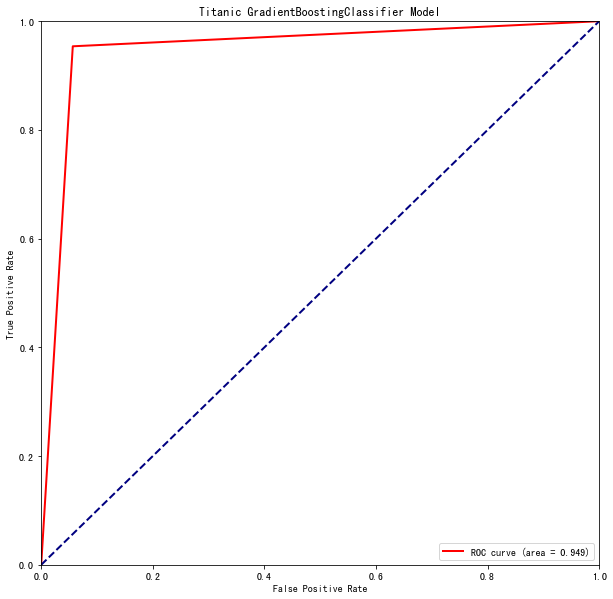

In [62]:
# 绘制 ROC 曲线
from matplotlib import pyplot as plt

#计算roc和auc
fpr, tpr, threshold  = metrics.roc_curve(y_true=y_test_new, y_score=predict)  # 计算真正率和假正率
roc_auc = metrics.auc(fpr,tpr)  # 也可以这么计算auc的值
print(roc_auc)

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='r',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)  # 假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('癌症预测模型')
plt.legend(loc="lower right")
plt.show()